Idea: <br /> 
Find generic TFs, therefor TFs that appear as TOP TFs in several/ a lot of comparisons and therefore likely do not carry any cell type specific meaning

In [1]:
import seaborn as sns
import collections as col
import pandas as pd
import statistics
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
from pathlib import Path
import gseapy as gp
import functions_sheet as myfunc
from gseapy import barplot, dotplot
import re
import upsetplot as usp
from collections import Counter
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from gseapy import Msigdb
from gseapy import GSEA

path_to_main_comparison_dir = "/nfs/data3/IHEC/TF_PRIO/comparisons/cells"
path_to_all_tfs_file = "/nfs/data3/IHEC/TF_PRIO/additional_files/all_tfs.txt"
path_to_figure_folder = "/nfs/data3/IHEC/TF_PRIO/created_plots/3_generic_TFs"

# read in data

In [2]:
tf_overlap_df_tpm = myfunc.create_overlap_df_with_tpm(path_to_main_comparison_dir, tpm_filter=1)
tf_overlap_df_tpm = myfunc.add_overlap_union_unique_shared_with_all_or_once(tf_overlap_df_tpm)

# read out generic TFs

In [3]:
list_all_active_markers = [tf for tf_set in tf_overlap_df_tpm["active_marks"] for tf in tf_set]
tf_counter_active_markers = Counter(list_all_active_markers)
count_counter_active_markers = dict(sorted(Counter(tf_counter_active_markers.values()).items()))

list_all_suppressive_markers = [tf for tf_set in tf_overlap_df_tpm["suppressive_marks"] for tf in tf_set]
tf_counter_suppressive_markers = Counter(list_all_suppressive_markers)
count_counter_suppressive_markers = dict(sorted(Counter(tf_counter_suppressive_markers.values()).items()))

In [4]:
df_active_generalistic_TFs = pd.DataFrame.from_dict(tf_counter_active_markers, orient="index")
df_active_generalistic_TFs.columns = ["occurences"]
df_suppressive_generalistic_TFs = pd.DataFrame.from_dict(tf_counter_suppressive_markers, orient="index")
df_suppressive_generalistic_TFs.columns = ["occurences"]


# creating barplots

## active markers

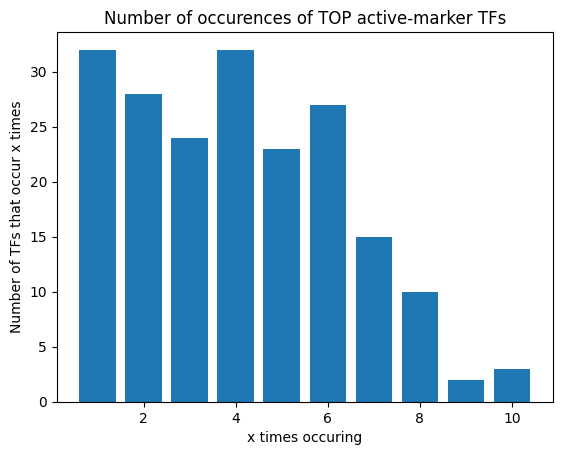

In [12]:
plt.bar(count_counter_active_markers.keys(),  count_counter_active_markers.values())
plt.title("Number of occurences of TOP active-marker TFs")
plt.ylabel("Number of TFs that occur x times")
plt.xlabel("x times occuring")
figure_file_name = "Barplot_occurences_active_TFs"
plt.savefig(os.path.join(path_to_figure_folder, figure_file_name), bbox_inches='tight')

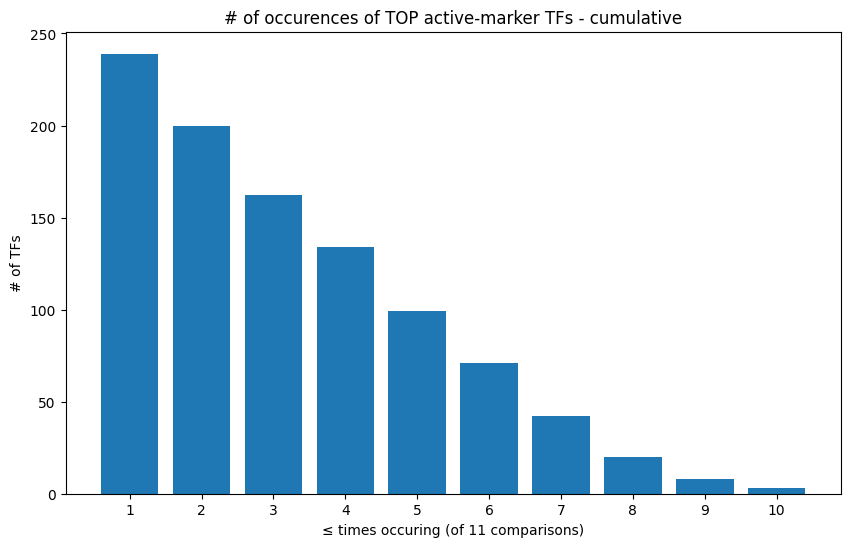

In [18]:
reverse_cumulative_values = []
cumulative_value = 0
for key in sorted(count_counter_active_markers.keys(), reverse=True):
    cumulative_value += count_counter_active_markers[key]
    reverse_cumulative_values.append(cumulative_value)

plt.figure(figsize=(10, 6))
reverse_cumulative_values.reverse()
plt.bar(range(1, len(reverse_cumulative_values) + 1), reverse_cumulative_values)
#plt.bar(range(1, len(reverse_cumulative_values) + 1), reverse_cumulative_values.reverse())
plt.xlabel("≤ times occuring (of 11 comparisons)")
#plt.xlabel("x times occuring")
#plt.ylabel("# of TFs that occur at least x times ")
plt.ylabel("# of TFs")
plt.title("# of occurences of TOP active-marker TFs - cumulative")
#plt.xticks(range(1, len(reverse_cumulative_values) + 1), reversed(count_counter_active_markers.keys()))
plt.xticks(range(1, len(reverse_cumulative_values) + 1), count_counter_active_markers.keys())
plt.show()

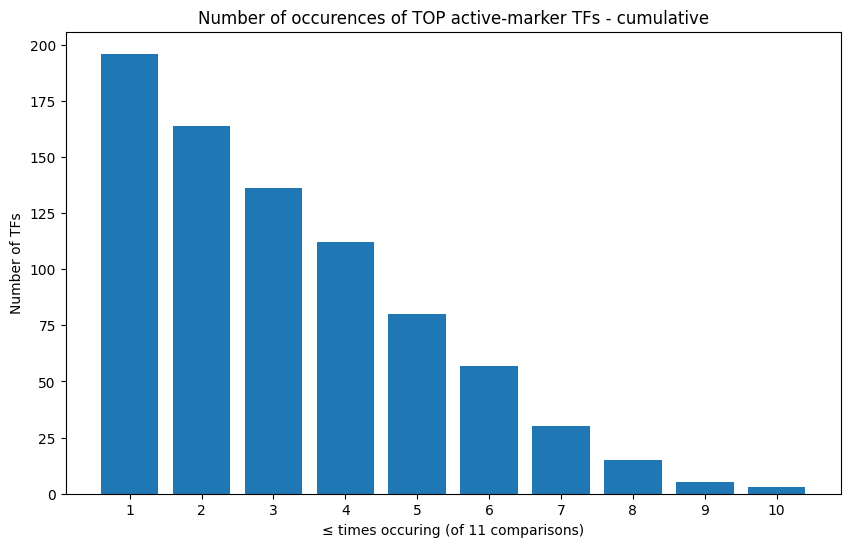

In [14]:

reverse_cumulative_values = []
cumulative_value = 0
for key in sorted(count_counter_active_markers.keys(), reverse=True):
    cumulative_value += count_counter_active_markers[key]
    reverse_cumulative_values.append(cumulative_value)

plt.figure(figsize=(10, 6))
reverse_cumulative_values.reverse()
plt.bar(range(1, len(reverse_cumulative_values) + 1), reverse_cumulative_values)
plt.xlabel("≤ times occuring (of 11 comparisons)")
plt.ylabel("Number of TFs")
plt.title("Number of occurences of TOP active-marker TFs - cumulative")

plt.xticks(range(1, len(reverse_cumulative_values) + 1), count_counter_active_markers.keys())
figure_file_name = "Barplot_occurences_active_TFs_cumulative"
plt.savefig(os.path.join(path_to_figure_folder, figure_file_name), bbox_inches='tight')
plt.show()

## suppressive markers

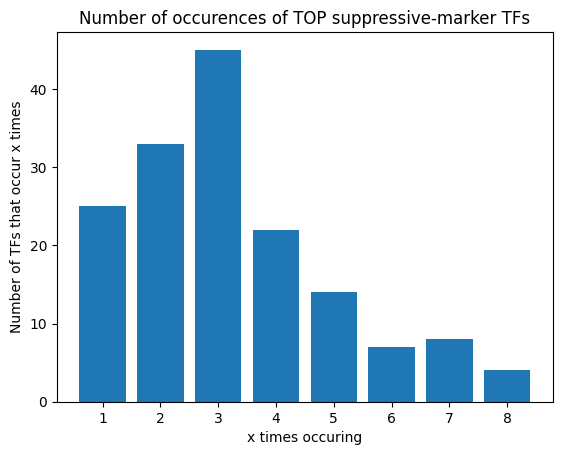

In [16]:
plt.bar(count_counter_suppressive_markers.keys(),  count_counter_suppressive_markers.values())
plt.title("Number of occurences of TOP suppressive-marker TFs")
plt.ylabel("Number of TFs that occur x times")
plt.xlabel("x times occuring")
figure_file_name = "Barplot_occurences_suppressive_TFs"
plt.savefig(os.path.join(path_to_figure_folder, figure_file_name), bbox_inches='tight')

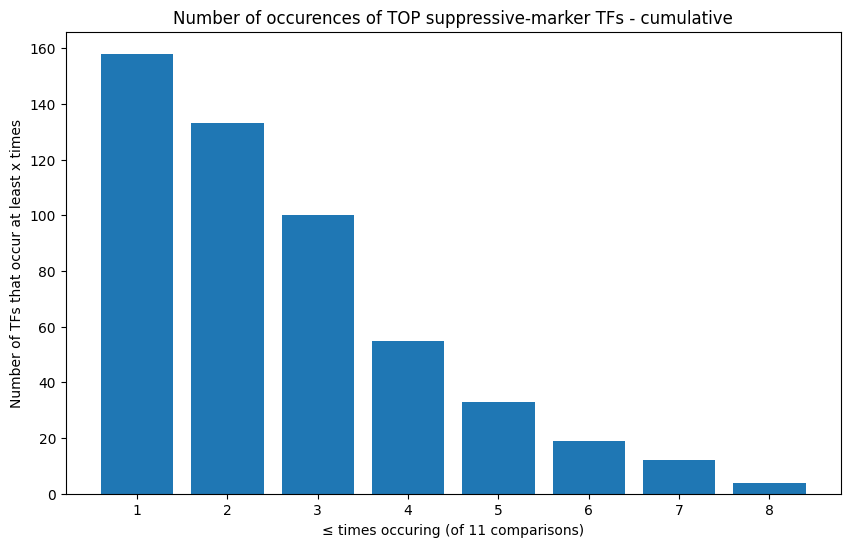

In [17]:
reverse_cumulative_values = []
cumulative_value = 0
for key in sorted(count_counter_suppressive_markers.keys(), reverse=True):
    cumulative_value += count_counter_suppressive_markers[key]
    reverse_cumulative_values.append(cumulative_value)

plt.figure(figsize=(10, 6))
reverse_cumulative_values.reverse()
plt.bar(range(1, len(reverse_cumulative_values) + 1), reverse_cumulative_values)
plt.xlabel("≤ times occuring (of 11 comparisons)")
plt.ylabel("Number of TFs that occur at least x times")
plt.title("Number of occurences of TOP suppressive-marker TFs - cumulative")
plt.xticks(range(1, len(reverse_cumulative_values) + 1), count_counter_suppressive_markers.keys())
figure_file_name = "Barplot_occurences_suppressive_TFs_cumulative"
plt.savefig(os.path.join(path_to_figure_folder, figure_file_name), bbox_inches='tight')
plt.show()

It was decided  in a talk with ML that the threshold shouldbe set at 9. Therefore no generic TFs for suppressive markers but some active

# selecting and looking at the TFs with set threshold

In [7]:
generalistic_TFs_active, generalistic_TFs_suppressive = myfunc.read_out_generalistic_TFs(tf_overlap_df_tpm, 9)

In [8]:
generalistic_TFs_active

['JUN', 'RELA', 'RBPJ', 'FOSL2', 'MGA']

In [9]:
generalistic_TFs_suppressive

[]